---
title: "Probability"
toc: true
---

### `.value_counts()`

The [`Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) methods counts the number of occurrence of each unique value in a `Series`. In other words, it *counts* the number of times each unique *value* appears. This is often useful for determining the most or least common entries in a `Series`.

In the example below, we can determine the name with the most years in which at least one person has taken that name by counting the number of times each name appears in the `"Name"` column of `elections`.

In [ ]:
elections["Party"].value_counts().head()

Democratic     47
Republican     41
Libertarian    12
Prohibition    11
Socialist      10
Name: Party, dtype: int64

### `.unique()`

If we have a Series with many repeated values, then [`.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) can be used to identify only the *unique* values. Here we return an array of all the names in `elections`. 

In [ ]:
elections["Result"].unique()

array(['loss', 'win'], dtype=object)

# Probability 

Probability allows us to talk about uncertainty, in certain terms. Once, we are able to quantify uncertainties, we can deterministically make deductions about the future. The language of statistics also allows us to talk about uncertainty in uncertain but tractable terms that we can reason about.

## Random Variable

A **random variable** is a mathematical formalization of an abstract quantity that has some degree of uncertainty associated with the values it may take on. 
The set of all possible values that a random variable can take on is called its **range**. 

A random variable is very much similar to a variable in computer programming. **In the context of `pandas`, a random variable is a column or feature in a `DataFrame`.**

Just as numerical features in a `DataFrame` can be either discrete or continuous, random variables can also be either discrete or continuous. The two types require different mathematical formalizations as we will see later.

Random variables are usually denoted by capital letters, such as $X$ or $Y$. The values that a random variable can take on are denoted by lower case letters, such as $x$ or $y$.

It is important to note that in the real world, it is _often impossible to obtain the range_ of a random variable. Since most real-world datasets are **samples**, **`df['X'].unique()` does not necessarily give us the range of $X$**.

It is also important to remember that **$x$ is a single value** but **$X$ is a collection of values** (i.e. `pd.Series`). 

In the example below, $C$ (coin) and $D$ (dice) are two random variables. 

In [ ]:
import pandas as pd 

data = pd.read_csv('../data/experiment.csv')
data.head()

,C,D
0,T,1
1,T,3
2,T,3
3,H,2
4,T,1


The ranges of $C$ and $D$ are $\{H, T\}$ and $\{1, 2, 3, 4, 5, 6\}$ respectively. It is worth repeating for emphasis that the ranges of the two variables is independent of observed data, since the observed data is a limited sample.

## Experiment, Outcome $\omega$ and Sample Space $\Omega$

An **outcome**, denoted by $\omega$, is the set of values that one or more random variables take on as a result of an **experiment**.

An **experiment** is a process that yields outcomes out of set of all possible outcomes. 

The **sample space**, denoted by $\Omega$, is the set of all possible outcomes. 

The important operative word here is _"possible"_. <u>The sample space is _not_ the set of all _observed_ outcomes</u>, the set of all possible outcomes.

If an experiment involves two random variables say $X$ and $Y$ which _can_ take on $n$ possible values (i.e. $~\text{range}_X = \{x_1, x_2, \ldots, x_n\})$ and $m$ possible values (i.e. $~\text{range}_Y = \{y_1, y_2, \ldots, y_m\}$) respectively, then the sample space $\Omega$ is the set of all possible combinations of $x_i$ and $y_j$ and is of size $n \times m$. 

<br/>
<center>

|**$\omega_i$** | **$X$** | **$Y$** | 
|:----:|:----:|:----:|
|$\omega_1$ | $x_1$ | $y_1$ | 
|$\omega_2$ | $x_1$ | $y_2$ | 
|: | : | : | 
| $\omega_{m}$ | $x_1$ | $y_m$ |
| $\omega_{m+1}$ | $x_2$ | $y_1$ |
| $\omega_{m+2}$ | $x_2$ | $y_2$ |
|: | : | : | 
| $\omega_{n \times m}$ | $x_n$ | $y_m$ |

</center>
<br/>

In other words, the sample space is the **cross product of the ranges of all random variables** involved in the experiment.

In our example, the experiment is the act of tossing a coin and rolling a dice. 

Each row in the data is an outcome $w_i$ from the set of all possible outcomes $\Omega$. 

$C$ variable can take on two ($n=2$) values: $\{H, T\}$ and $D$ variable can take on six $m=6$ value: $\{1, 2, 3, 4, 5, 6\}$. This means that the sample space $\Omega$ is of size $n \times m = 2 \times 6 = 12$.

However, the observed outcomes are only 11, as shown below. 

In [ ]:
data.groupby(['C', 'D']).count().reset_index()

,C,D
0,H,1
1,H,2
2,H,3
3,H,4
4,H,5
5,H,6
6,T,1
7,T,2
8,T,3
9,T,4


This means that the sample space $\Omega$ is not the set of all observed outcomes. This is despite the fact that many observed outcomes are observed more than once. The missing outcome, that is never observed, is $w_{12} = (T, 6)$.

## Probability Model $P(X)$

Probability model is a function that assigns a probability score $P(\omega_i)$ to each possible outcome $\omega_i$ for every $\omega_i \in \Omega$ such that 
<!-- $ 0 \lt P(\omega_i) \lt 1 $ and $\sum_{\omega \in \Omega} P(\omega_i) = 1$. -->
<!-- such that  -->

$$ 0 \lt P(\omega_i) \lt 1 ~~~\text{and}~~~ \sum_{\omega \in \Omega} P(\omega_i) = 1$$

For example, if we have a random variable $D$ for rolling a die, the probability model assigns a probability to each number that we can roll. The probability model is usually denoted by $P(\omega_i)$ or $P(D=d)$


$\omega$ | $D$ | $P(D=d)$ |
:-------:|:----:|:-----:|
$\omega_1$ | $1$ | $P(D=1)$ |
$\omega_2$ | $2$  | $P(D=2)$ |
$\omega_3$ | $3$  | $P(D=3)$ |
$\omega_4$ | $4$  | $P(D=4)$ |
$\omega_5$ | $5$  | $P(D=5)$ |
$\omega_6$ | $6$  | $P(D=6)$ |

such that $0 \leq P(D=d) \leq 1$ and and $\sum_{d \in D} P(d=D) = 1$.

In [ ]:
fair_die = pd.read_csv('../data/fair_die.csv')
fair_die

,D,P(D)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


The code cell above shows the probability model for the random variable $D$ for a fair die in our examples, where each number has a probability of $\frac{1}{6}$.

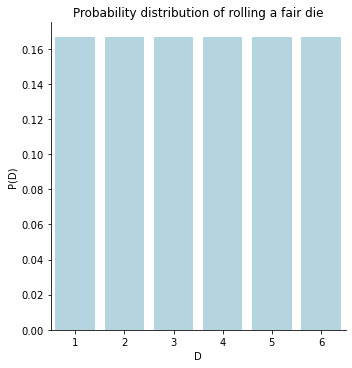

In [ ]:
import seaborn as sns 
from matplotlib import pyplot as plt

axs = sns.catplot(data=fair_die, kind='bar', x="D", y="P(D)", color="lightblue");
axs.set(title="Probability distribution of rolling a fair die");

``` {admonition} A word of caution on <u>mathematical notation</u> and <u>dimensionality</u>: 

Uppercase letters ($X, Y ...$) often refer to a random variable. Lowercase letters ($x, y ...$) often refer to a particular outcome of a random variable.

The following refer to a probability <u>value</u> (`int`, `float` etc.):
* $P(X = x)$ 
    * also written in shorthand as $P(x)$
* $P(X = x ∧ Y = y)$  
    * also written in shorthand as $P(x, y)$

The following refer to <u>a collection of values</u> (`pd.Series`, `pd.DataFrame` etc.):

* $P(X)$
* $P(X ∧ Y)$
    * also written as P(X, Y)
* $P(X = x, Y)$


## Probability of an Event $P(\phi)$

An event $\phi$ is a set of possible worlds $\{\omega_i, \omega_j, ... \omega_n\}$. In other words, an event $\phi$ is a subset of $\Omega$ i.e. $\phi \subset \Omega$

If we continue with the example of rolling a die, we can define an event $\phi$ as the set of all possible worlds where the die rolls an even number. From the table above, we can see that there are three possible worlds where the die rolls an even number. 

Therefore, the event $\phi$ is the set $\{\omega_2, \omega_4, \omega_6\}$ or $\{D=2, D=4, D=6\}$.

<!-- An example of an event is at least one Heads  $ \phi = \{\omega_1 , \omega_2 , \omega_3\}$ -->

$P (\phi) = \sum_{\omega \in \phi} P(\omega)$ is the sum of probabilities of the set of possible worlds defining $\phi$

$P (\phi_1) = P(\text{Die rolls an even number}) = P(\omega_2) +P(\omega_4) + P(\omega_6) = 0.167 + 0.167 + 0.167  \approx 0.5 $


In [ ]:
event_condition = fair_die['D'].apply(lambda x: x % 2 == 0)

event = fair_die[event_condition]

P_event = event['P(D)'].sum()

round(P_event, 2)

0.5